<a href="https://colab.research.google.com/github/SHASHANK8412/Restaurant-Ratings/blob/main/Cuisine_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Loading the dataset


In [39]:
df=pd.read_csv('Dataset .csv')
print(df.isna().sum())
print(df.info())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9

Handling Missing values and Encoding categorical Variables


In [40]:
# Drop missing cuisines
df = df.dropna(subset=["Cuisines"])

# Keep only top 10 cuisines
top_cuisines = df["Cuisines"].value_counts().nlargest(10).index
df = df[df["Cuisines"].isin(top_cuisines)]

# Encode cuisines as labels
le = LabelEncoder()
df["Cuisine_Label"] = le.fit_transform(df["Cuisines"])

# Combine text features
df["text"] = df["Restaurant Name"].astype(str) + " " + df["City"].astype(str) + " " + df["Cuisines"].astype(str)

# TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words="english", max_features=5000)
X = tfidf.fit_transform(df["text"])

y = df["Cuisine_Label"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



Model Selection

In [41]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3522 entries, 5 to 9550
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         3522 non-null   int64  
 1   Restaurant Name       3522 non-null   object 
 2   Country Code          3522 non-null   int64  
 3   City                  3522 non-null   object 
 4   Address               3522 non-null   object 
 5   Locality              3522 non-null   object 
 6   Locality Verbose      3522 non-null   object 
 7   Longitude             3522 non-null   float64
 8   Latitude              3522 non-null   float64
 9   Cuisines              3522 non-null   object 
 10  Average Cost for two  3522 non-null   int64  
 11  Currency              3522 non-null   object 
 12  Has Table booking     3522 non-null   object 
 13  Has Online delivery   3522 non-null   object 
 14  Is delivering now     3522 non-null   object 
 15  Switch to order menu  3522

Train the Model

In [42]:
# Random Forest
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds, target_names=le.classes_))

# XGBoost
xgb = XGBClassifier(eval_metric="mlogloss", use_label_encoder=False, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds, target_names=le.classes_))

Random Forest Accuracy: 0.9985815602836879
                                precision    recall  f1-score   support

                        Bakery       1.00      0.98      0.99        44
              Bakery, Desserts       0.97      1.00      0.99        34
                          Cafe       1.00      1.00      1.00        60
                       Chinese       1.00      1.00      1.00        71
                     Fast Food       1.00      1.00      1.00        71
                  North Indian       1.00      1.00      1.00       187
         North Indian, Chinese       1.00      1.00      1.00       102
         North Indian, Mughlai       1.00      1.00      1.00        67
North Indian, Mughlai, Chinese       1.00      1.00      1.00        39
                   Street Food       1.00      1.00      1.00        30

                      accuracy                           1.00       705
                     macro avg       1.00      1.00      1.00       705
                  w

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [04:48:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9985815602836879
                                precision    recall  f1-score   support

                        Bakery       1.00      0.98      0.99        44
              Bakery, Desserts       0.97      1.00      0.99        34
                          Cafe       1.00      1.00      1.00        60
                       Chinese       1.00      1.00      1.00        71
                     Fast Food       1.00      1.00      1.00        71
                  North Indian       1.00      1.00      1.00       187
         North Indian, Chinese       1.00      1.00      1.00       102
         North Indian, Mughlai       1.00      1.00      1.00        67
North Indian, Mughlai, Chinese       1.00      1.00      1.00        39
                   Street Food       1.00      1.00      1.00        30

                      accuracy                           1.00       705
                     macro avg       1.00      1.00      1.00       705
                  weighte

Using a Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

print("Decision Tree Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_dt, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_dt, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Classifier Metrics:
Accuracy: 0.9985815602836879
Recall: 0.9985815602836879
Precision: 0.9986220871327255
F1-Score: 0.9985836868799642
Confusion Matrix:
 [[ 43   1   0   0   0   0   0   0   0   0]
 [  0  34   0   0   0   0   0   0   0   0]
 [  0   0  60   0   0   0   0   0   0   0]
 [  0   0   0  71   0   0   0   0   0   0]
 [  0   0   0   0  71   0   0   0   0   0]
 [  0   0   0   0   0 187   0   0   0   0]
 [  0   0   0   0   0   0 102   0   0   0]
 [  0   0   0   0   0   0   0  67   0   0]
 [  0   0   0   0   0   0   0   0  39   0]
 [  0   0   0   0   0   0   0   0   0  30]]


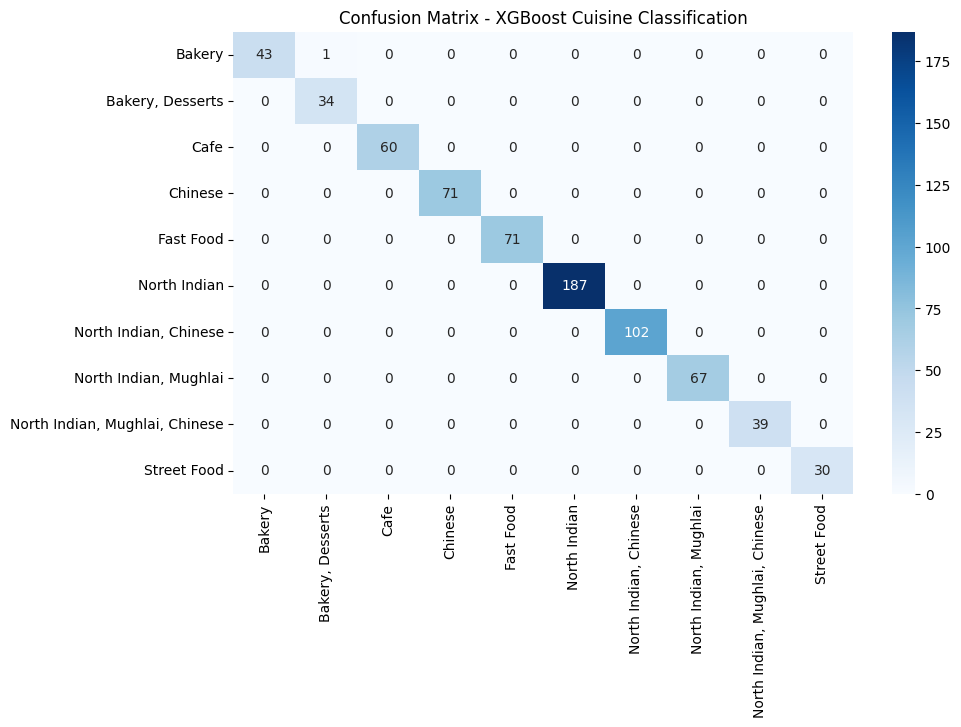

In [46]:
cm = confusion_matrix(y_test, xgb_preds)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - XGBoost Cuisine Classification")
plt.show()